In [1]:
import numpy as np
Q = np.array([
    [-302,  132,  168,  228,   60,   12,   24,   48,   96,  192],
    [   0, -949,  616,  836,  220,   44,   88,  176,  352,  704],
    [   0,    0, -1074, 1064, 280,   56,  112,  224,  448,  896],
    [   0,    0,    0, -1259, 380,   76,  152,  304,  608, 1216],
    [   0,    0,    0,    0, -486,   20,   40,   80,  160,  320],
    [   0,    0,    0,    0,   0, -102,    8,   16,   32,   64],
    [   0,    0,    0,    0,   0,    0, -200,   32,   64,  128],
    [   0,    0,    0,    0,   0,    0,    0, -384, 128,  256],
    [   0,    0,    0,    0,   0,    0,    0,    0, -704, 512],
    [   0,    0,    0,    0,   0,    0,    0,    0,    0, -1152]
])


In [2]:
Q

array([[ -302,   132,   168,   228,    60,    12,    24,    48,    96,
          192],
       [    0,  -949,   616,   836,   220,    44,    88,   176,   352,
          704],
       [    0,     0, -1074,  1064,   280,    56,   112,   224,   448,
          896],
       [    0,     0,     0, -1259,   380,    76,   152,   304,   608,
         1216],
       [    0,     0,     0,     0,  -486,    20,    40,    80,   160,
          320],
       [    0,     0,     0,     0,     0,  -102,     8,    16,    32,
           64],
       [    0,     0,     0,     0,     0,     0,  -200,    32,    64,
          128],
       [    0,     0,     0,     0,     0,     0,     0,  -384,   128,
          256],
       [    0,     0,     0,     0,     0,     0,     0,     0,  -704,
          512],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
        -1152]])

$$
\sum_{i \in L} \sum_{n \in M} x_{i,n} = 3
$$

In [12]:
import numpy as np

Q = np.array([
    [-302,  132,  168,  228,   60,   12,   24,   48,   96,  192],
    [   0, -949,  616,  836,  220,   44,   88,  176,  352,  704],
    [   0,    0, -1074, 1064, 280,   56,  112,  224,  448,  896],
    [   0,    0,    0, -1259, 380,   76,  152,  304,  608, 1216],
    [   0,    0,    0,    0, -486,   20,   40,   80,  160,  320],
    [   0,    0,    0,    0,   0, -102,    8,   16,   32,   64],
    [   0,    0,    0,    0,   0,    0, -200,   32,   64,  128],
    [   0,    0,    0,    0,   0,    0,    0, -384, 128,  256],
    [   0,    0,    0,    0,   0,    0,    0,    0, -704, 512],
    [   0,    0,    0,    0,   0,    0,    0,    0,    0, -1152]
])
Q = Q + Q.T - np.diag(np.diag(Q))  # symetryzacja

P = 2  # waga kary
k = 4     # liczba elementów do wybrania
S = [0, 1, 2, 3, 4]

# Dodaj x_i^2: przekątna Q[i, i] += P
for i in S:
    Q[i, i] += P

# Dodaj 2 x_i x_j: Q[i, j] += 2P (dla i < j)
for i in S:
    for j in S:
        if i < j:
            Q[i, j] += 2 * P
            Q[j, i] += 2 * P  # bo Q musi być symetryczna

# Dodaj -2k x_i: Q[i, i] += -2Pk (czyli -8000)
for i in S:
    Q[i, i] += -2 * P * k

In [13]:
Q

array([[ -316,   136,   172,   232,    64,    12,    24,    48,    96,
          192],
       [  136,  -963,   620,   840,   224,    44,    88,   176,   352,
          704],
       [  172,   620, -1088,  1068,   284,    56,   112,   224,   448,
          896],
       [  232,   840,  1068, -1273,   384,    76,   152,   304,   608,
         1216],
       [   64,   224,   284,   384,  -500,    20,    40,    80,   160,
          320],
       [   12,    44,    56,    76,    20,  -102,     8,    16,    32,
           64],
       [   24,    88,   112,   152,    40,     8,  -200,    32,    64,
          128],
       [   48,   176,   224,   304,    80,    16,    32,  -384,   128,
          256],
       [   96,   352,   448,   608,   160,    32,    64,   128,  -704,
          512],
       [  192,   704,   896,  1216,   320,    64,   128,   256,   512,
        -1152]])

In [14]:
import torch
from torch_geometric.data import Data
import numpy as np
N = Q.shape[0]
Q_sparse = (Q != 0)
rows, cols = np.where(Q_sparse)

edge_index = torch.tensor(np.vstack([rows, cols]), dtype=torch.long)
edge_attr = torch.tensor(Q[rows, cols], dtype=torch.float)

x = torch.ones((N, 1), dtype=torch.float)

data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
data.edge_weight = edge_attr

In [15]:
data

Data(x=[10, 1], edge_index=[2, 100], edge_attr=[100], edge_weight=[100])

### Jak to wygląda ?

Edge (0, 0) weight: -316
Edge (0, 1) weight: 136
Edge (0, 2) weight: 172
Edge (0, 3) weight: 232
Edge (0, 4) weight: 64
Edge (0, 5) weight: 12
Edge (0, 6) weight: 24
Edge (0, 7) weight: 48
Edge (0, 8) weight: 96
Edge (0, 9) weight: 192
Edge (1, 1) weight: -963
Edge (1, 2) weight: 620
Edge (1, 3) weight: 840
Edge (1, 4) weight: 224
Edge (1, 5) weight: 44
Edge (1, 6) weight: 88
Edge (1, 7) weight: 176
Edge (1, 8) weight: 352
Edge (1, 9) weight: 704
Edge (2, 2) weight: -1088
Edge (2, 3) weight: 1068
Edge (2, 4) weight: 284
Edge (2, 5) weight: 56
Edge (2, 6) weight: 112
Edge (2, 7) weight: 224
Edge (2, 8) weight: 448
Edge (2, 9) weight: 896
Edge (3, 3) weight: -1273
Edge (3, 4) weight: 384
Edge (3, 5) weight: 76
Edge (3, 6) weight: 152
Edge (3, 7) weight: 304
Edge (3, 8) weight: 608
Edge (3, 9) weight: 1216
Edge (4, 4) weight: -500
Edge (4, 5) weight: 20
Edge (4, 6) weight: 40
Edge (4, 7) weight: 80
Edge (4, 8) weight: 160
Edge (4, 9) weight: 320
Edge (5, 5) weight: -102
Edge (5, 6) weight

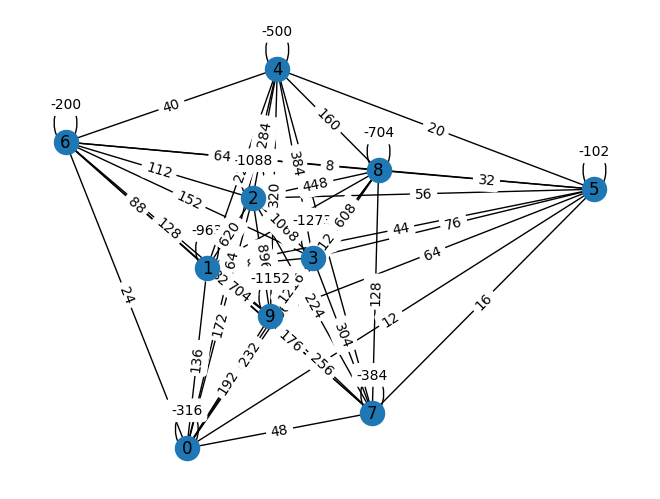

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(range(N))
rows, cols = np.where(Q_sparse)
for i, j in zip(rows, cols):
    G.add_edge(i, j, weight=Q[i, j])


for u, v, attr in G.edges(data=True):
    print(f"Edge ({u}, {v}) weight: {attr['weight']}")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.optim import Adam

# --- Model GNN ---
class QUBOGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.01):
        super(QUBOGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_weight
        x = self.conv1(x, edge_index, edge_weight=edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index, edge_weight=edge_weight)
        return torch.sigmoid(x).squeeze()

In [18]:
def qubo_loss(probs, Q):
    probs = probs.view(-1, 1)  # (N, 1)
    Q = Q.detach().float().to(probs.device)
    return (probs.T @ Q @ probs).squeeze()

In [19]:
def train_qubo_gnn(data, Q, model, optimizer, epochs=1000, tol=1e-4, patience=10000, threshold=0.5):
    best_loss = float('inf')
    best_solution = None
    wait = 0

    if not isinstance(Q, torch.Tensor):
        Q = torch.tensor(Q, dtype=torch.float32)
    Q = Q.detach().to(model.parameters().__next__().device)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        probs = model(data)
        loss = qubo_loss(probs, Q)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")
            print(f"Probabilites {probs}")

        # Early stopping
        if loss.item() + tol < best_loss:
            best_loss = loss.item()
            best_solution = (probs >= threshold).float().detach()
            wait = 0
        else:
            wait += 1

        if wait >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    return best_solution, best_loss

In [20]:
in_channels = 1
hidden_channels = 16
out_channels = 1
dropout = 0
learning_rate = 1e-3
epochs = 50000
tolerance = 1e-4
patience = 2000
threshold = 0.8

model = QUBOGCN(in_channels, hidden_channels, out_channels, dropout)
model = model.to(torch.float32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# ===== Trening =====
best_solution, best_loss = train_qubo_gnn(
    data=data,
    Q=Q,
    model=model,
    optimizer=optimizer,
    epochs=epochs,
    tol=tolerance,
    patience=patience,
    threshold=threshold
)

# Przedmioty i ich wagi (tu przyjmujemy, że wartość = waga)
items = ["⚽️", "💻", "📸", "📚", "🎸"]
values_list = [8, 47, 10, 5, 16]
weights_list = [3, 11, 14, 19, 5]

# Rozwiązanie binarne
solution = best_solution.int().cpu().tolist()

# Oblicz wagę, zysk i wybrane przedmioty
selected_items = [(items[i], weights_list[i]) for i in range(5) if solution[i] == 1]
total_weight = sum(w for _, w in selected_items)
total_value = total_weight  # jeśli wartość = waga
selected_names = [name for name, _ in selected_items]

print(f"Najlepsze rozwiązanie (bitstring): {solution}")
print(f"Wybrane przedmioty: {selected_names}")
print(f"Łączna waga: {total_weight}")
print(f"Zysk: {total_value}")
print(f"Funkcja celu QUBO (łącznie z karą): {best_loss:.4f}")

Epoch 0, Loss: 4405.111328
Probabilites tensor([0.5088, 0.5131, 0.5140, 0.5147, 0.5103, 0.5060, 0.5075, 0.5095, 0.5120,
        0.5145], device='cuda:0', grad_fn=<SqueezeBackward0>)
Epoch 100, Loss: 1674.493530
Probabilites tensor([0.3807, 0.3175, 0.3025, 0.2869, 0.3595, 0.4145, 0.3962, 0.3698, 0.3343,
        0.2948], device='cuda:0', grad_fn=<SqueezeBackward0>)
Epoch 200, Loss: 614.028687
Probabilites tensor([0.2901, 0.1928, 0.1728, 0.1525, 0.2542, 0.3533, 0.3175, 0.2714, 0.2163,
        0.1627], device='cuda:0', grad_fn=<SqueezeBackward0>)
Epoch 300, Loss: 243.890839
Probabilites tensor([0.2302, 0.1212, 0.1023, 0.0843, 0.1873, 0.3120, 0.2645, 0.2071, 0.1454,
        0.0933], device='cuda:0', grad_fn=<SqueezeBackward0>)
Epoch 400, Loss: 114.567062
Probabilites tensor([0.1920, 0.0833, 0.0667, 0.0519, 0.1467, 0.2845, 0.2297, 0.1670, 0.1056,
        0.0592], device='cuda:0', grad_fn=<SqueezeBackward0>)
Epoch 500, Loss: 62.274353
Probabilites tensor([0.1666, 0.0619, 0.0476, 0.0353, 0.121